# 1.导入数据

In [2]:
import pandas as pd
import numpy as np

In [15]:
import numpy as np

def calculate_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#针对小样本数据进行，随机取样加噪声注入，创造"新样本"
#判断数据有几位小数
def count_decimal_places(number):
    # 将数字转换为字符串
    number_str = str(number)
    
    # 找到小数点的位置
    decimal_point_index = number_str.find(".")
    
    # 如果存在小数点，则计算小数部分的长度
    if decimal_point_index != -1:
        decimal_part = number_str[decimal_point_index + 1:]
        return len(decimal_part)
    else:
        # 如果不存在小数点，说明没有小数部分
        return 0

#定义添加噪声函数
def add_noise(X, noise_factor=0.03):
    #创造一个储存新数据的列表
    new_data =list()

    #获取每一个特征的最大值
    X_max = X.max(axis=0)

    #添加噪音
    for col_num in range(len(X[0])):
        X_max_decimal_count = count_decimal_places(X_max[col_num])
        col_add_noise = noise_factor*(X_max[col_num]/100)*np.random.normal(loc=0.0, scale=1.0, size=X[:,col_num].shape)+X[:,col_num]
        col_add_noise = col_add_noise.round(X_max_decimal_count)
        new_data.append(col_add_noise)

    new_data = np.vstack(new_data)
    new_data = np.where(new_data.T<=0,+0,new_data.T)
    
    return new_data

#创建随机数据
def creat_data(X,num,*pops):
    #X是一个DataFrame类型
    pops = list(pops)
    columns_ori = list(X.columns)
    X_plus = X.sample(frac=0.8)
    columns_2 = [i for i in columns_ori if i not in pops]
    columns_3 = columns_2 + pops
    for i in range(num):
        pops_list = list()
        X_samples = X.sample(frac=0.8,random_state=i+25)
        X_samples_index = X_samples.index
        for j in range(len(pops)):
            X_samples_pop = np.array(X_samples.pop(pops[j]))
            pops_list.append(X_samples_pop)
        pops_list = np.vstack(pops_list)
        pops_list = pops_list.T
        X_samples_array = np.array(X_samples)
        X_samples_array_new = add_noise(X_samples_array,noise_factor=0.1)
        X_new = np.append(X_samples_array_new,pops_list,axis=1)
        X_new_df = pd.DataFrame(X_new,columns=columns_3)
        X_plus = pd.concat([X_plus,X_new_df],axis=0,ignore_index=True)
    return X_plus

# # 计算MAPE
# mape = calculate_mape(y_test, y_pred6)
# print(f'MAPE: {mape:.2f}%')

In [ ]:
data_new = creat_data(data,100,'Raw materials’ type','Method')
data_new

In [2]:
data = pd.read_excel('./data/无模型预测数据.xlsx',index_col=0).iloc[:,1:]
data.columns
# len(data[data['Raw materials’ type']=='Biodegradable waste'])

Index(['Raw materials’ type', 'C', 'H', 'O', 'N', 'S', 'H/C', 'O/C', 'Ash',
       'Method', 'Ea (mean)'],
      dtype='object')

# 2.数据处理与特征工程

## 2.1分类数据

In [5]:
# data["Raw materials’ type"].unique()
data["Raw materials’ type"].unique()

array(['Lignocellulose', 'Biodegradable waste', 'Cellulose', 'Fossil',
       'Algae'], dtype=object)

### 2.1.1序号编码处理分类数据

In [3]:
#分类数据
Raw_materuals_type = {
    'Lignocellulose':0,
    'Biodegradable waste':1,
    'Cellulose':2,
    'Fossil':3,
    'Algae':4
}

Method_type = {
    'KAS':0,
    'OFW':1,
    'FRD':2
}

data_oe1 = data.copy()
data_oe1["Raw materials’ type"] = data_oe1["Raw materials’ type"].map(Raw_materuals_type).astype('category')
data_oe1["Method"] = data_oe1["Method"].map(Method_type).astype('category')
data_oe1



#'Lignocellulose'数据
lig_data =  data_oe1[data_oe1['Raw materials’ type']==0]
#'Biodegradable waste'数据
bio_data =  data_oe1[data_oe1['Raw materials’ type']==1]
#Cellulose数据
Cel_data = data_oe1[data_oe1['Raw materials’ type']==2]
#Fossil数据
fos_data = data_oe1[data_oe1['Raw materials’ type']==3]
#Algae数据
alg_data = data_oe1[data_oe1['Raw materials’ type']==4]

# alg_data['Method']
# data_oe1

### 2.1.2独热编码处理分类数据

In [115]:
data_oe2 = data.copy()
data_oe2

,Raw materials’ type,C,H,O,N,S,H/C,O/C,Ash,Method,Ea (mean)
0,Lignocellulose,47.60,6.76,44.51,1.13,0.00,1.6921,0.7019,1.24,KAS,197.60
1,Lignocellulose,47.60,6.76,44.51,1.13,0.00,1.6921,0.7019,1.24,OFW,197.30
2,Lignocellulose,47.60,6.76,44.51,1.13,0.00,1.6921,0.7019,1.24,FRD,186.00
3,Biodegradable waste,55.72,4.81,37.92,0.43,0.22,1.0285,0.5108,0.90,KAS,79.00
4,Biodegradable waste,55.72,4.81,37.92,0.43,0.22,1.0285,0.5108,0.90,OFW,82.00
...,...,...,...,...,...,...,...,...,...,...,...
276,Lignocellulose,48.69,6.39,44.26,0.00,0.66,1.5637,0.6823,2.40,KAS,179.95
277,Lignocellulose,48.69,6.39,44.26,0.00,0.66,1.5637,0.6823,2.40,OFW,180.47
278,Lignocellulose,48.69,6.39,44.26,0.00,0.66,1.5637,0.6823,2.40,FRD,177.06
279,Biodegradable waste,84.20,7.10,6.20,0.40,2.10,1.0047,0.0553,5.30,KAS,161.50


In [30]:
#利用pandas
data_oe2 = pd.get_dummies(data_oe2,prefix=['type','method'],columns=['Raw materials’ type','Method'])
data_oe2

,C,H,O,N,S,H/C,O/C,Ash,Ea (mean),type_Algae,type_Biodegradable waste,type_Cellulose,type_Fossil,type_Lignocellulose,method_FRD,method_KAS,method_OFW
0,47.60,6.76,44.51,1.13,0.00,1.6921,0.7019,1.24,197.60,False,False,False,False,True,False,True,False
1,47.60,6.76,44.51,1.13,0.00,1.6921,0.7019,1.24,197.30,False,False,False,False,True,False,False,True
2,47.60,6.76,44.51,1.13,0.00,1.6921,0.7019,1.24,186.00,False,False,False,False,True,True,False,False
3,55.72,4.81,37.92,0.43,0.22,1.0285,0.5108,0.90,79.00,False,True,False,False,False,False,True,False
4,55.72,4.81,37.92,0.43,0.22,1.0285,0.5108,0.90,82.00,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,48.69,6.39,44.26,0.00,0.66,1.5637,0.6823,2.40,179.95,False,False,False,False,True,False,True,False
277,48.69,6.39,44.26,0.00,0.66,1.5637,0.6823,2.40,180.47,False,False,False,False,True,False,False,True
278,48.69,6.39,44.26,0.00,0.66,1.5637,0.6823,2.40,177.06,False,False,False,False,True,True,False,False
279,84.20,7.10,6.20,0.40,2.10,1.0047,0.0553,5.30,161.50,False,True,False,False,False,False,True,False


In [3]:
#利用sklearn库
from sklearn.preprocessing import OneHotEncoder
data_oe3 = data.copy()

categories = []
ohc = OneHotEncoder()
ohc_data = ohc.fit_transform(data_oe3[['Raw materials’ type','Method']]).toarray()
for k,i in enumerate(ohc.categories_):
    for j in i:
        if k ==0:
            categories.append('type_'+j)
        if k ==1:
            categories.append('method_'+j)
ohc_data_df = pd.DataFrame(ohc_data,columns=[i for i in categories])
data_oe3.drop(columns=['Raw materials’ type','Method'],inplace=True)  #弹出['Raw materials’ type','Method']两列
data_oe3 = pd.concat([data_oe3,ohc_data_df],axis=1)
data_oe3

,C,H,O,N,S,H/C,O/C,Ash,Ea (mean),type_Algae,type_Biodegradable waste,type_Cellulose,type_Fossil,type_Lignocellulose,method_FRD,method_KAS,method_OFW
0,47.60,6.76,44.51,1.13,0.00,1.6921,0.7019,1.24,197.60,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,47.60,6.76,44.51,1.13,0.00,1.6921,0.7019,1.24,197.30,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,47.60,6.76,44.51,1.13,0.00,1.6921,0.7019,1.24,186.00,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,55.72,4.81,37.92,0.43,0.22,1.0285,0.5108,0.90,79.00,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,55.72,4.81,37.92,0.43,0.22,1.0285,0.5108,0.90,82.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,48.69,6.39,44.26,0.00,0.66,1.5637,0.6823,2.40,179.95,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
277,48.69,6.39,44.26,0.00,0.66,1.5637,0.6823,2.40,180.47,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
278,48.69,6.39,44.26,0.00,0.66,1.5637,0.6823,2.40,177.06,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
279,84.20,7.10,6.20,0.40,2.10,1.0047,0.0553,5.30,161.50,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
#判断是否有空值
for i in ['C','H','O','N','S','H/C','O/C','Ash','Ea (mean)']:
    print(data_oe1[i].isna().sum(),end=',')

0,0,0,0,0,0,0,0,0,

## 2.2数据探索

### 2.2.1箱线图查看数据取值范围

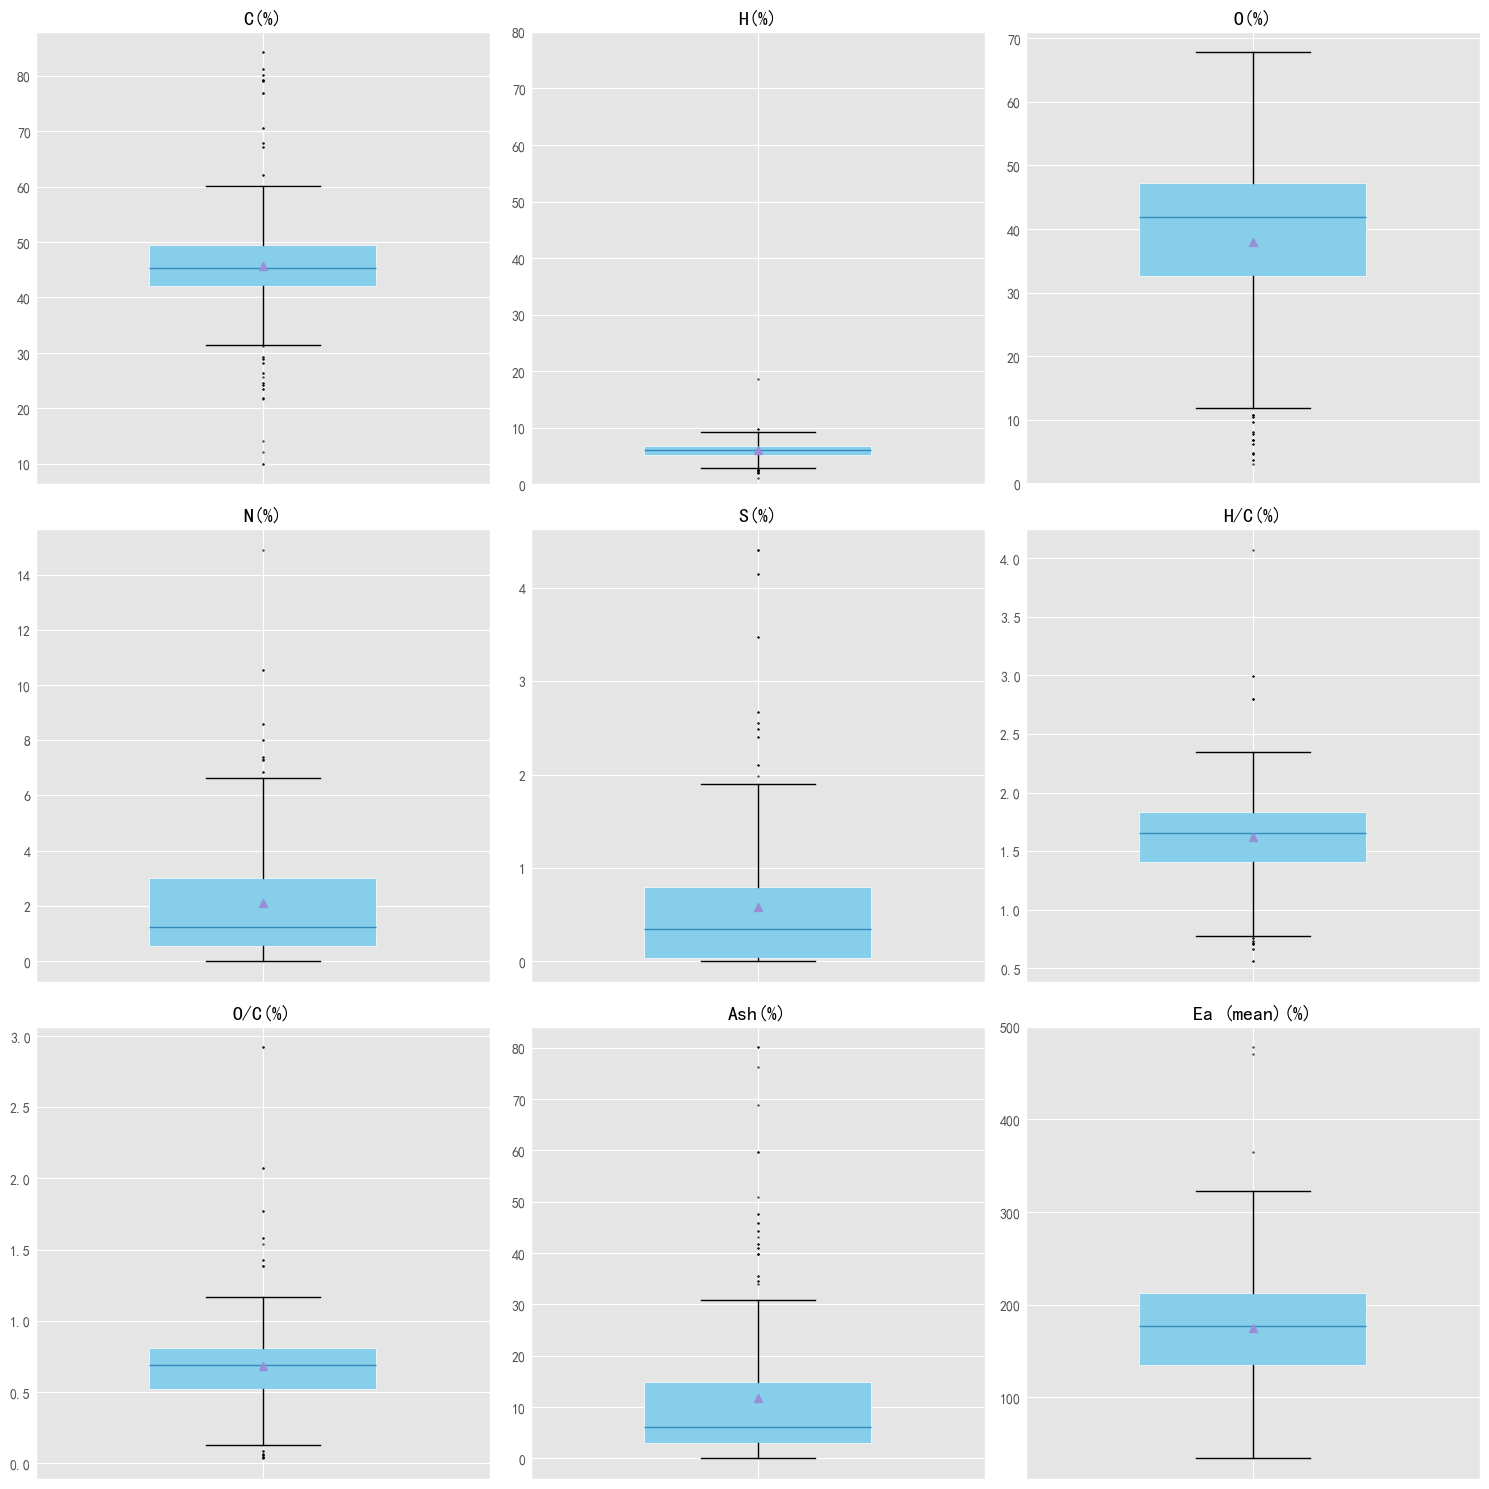

In [15]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('_mpl-gallery')

# 画图时显示汉字
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False  # 正常显示负号

def box_plot(ax,data,label):
    median = np.median(data)
    q1,q3 = np.percentile(data,[25,75])
    min_value,max_value = np.min(data),np.max(data)

    ax.boxplot(
        data, patch_artist=True,
        flierprops=dict(marker='.', markersize=1),   #标记异常点，并设置异常点大小
        showmeans=True,  #以点的形式显示均值
        widths=0.5,  #箱子宽度
        boxprops={"facecolor": "skyblue", "edgecolor": "white",
                          "linewidth": 0.5},
        
    )

    
    # 设置 x 轴刻度和标签
    ax.set_xticks([1],[])  # 设置 x 轴刻度位置
    # ax.set_xticklabels()  # 设置 x 轴刻度标签
    if label == 'H':
         ax.set_yticks([j for j in range(0,90,10)])
    #设置子图标题
    ax.set_title(f'{label}(%)')

    

#创建图形，大小为15*15英寸
plt.style.use('ggplot')  # 使用有效的样式
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()
#分为3*3的子图
for i,label in enumerate(['C','H','O','N','S','H/C','O/C','Ash','Ea (mean)']):
    box_plot(axes[i],data=data_oe1[label],label=label)
plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
plt.show()

### 2.2.2散点图

In [10]:
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
#在图中显示中文和负号
mp.rcParams['font.sans-serif'] = [u'SimHei']
mp.rcParams['axes.unicode_minus'] = False

labelencoder = LabelEncoder()
data["Raw materials’ type"] = labelencoder.fit_transform(data["Raw materials’ type"])
labelencoder.classes_   #'Algae', 'Biodegradable waste', 'Cellulose', 'Fossil','Lignocellulose',对应0,1,2,3,4

array(['Algae', 'Biodegradable waste', 'Cellulose', 'Fossil',
       'Lignocellulose'], dtype=object)

In [34]:
LabelEncoder?#查看文档

Text(0, 0.5, 'Ash(%)')

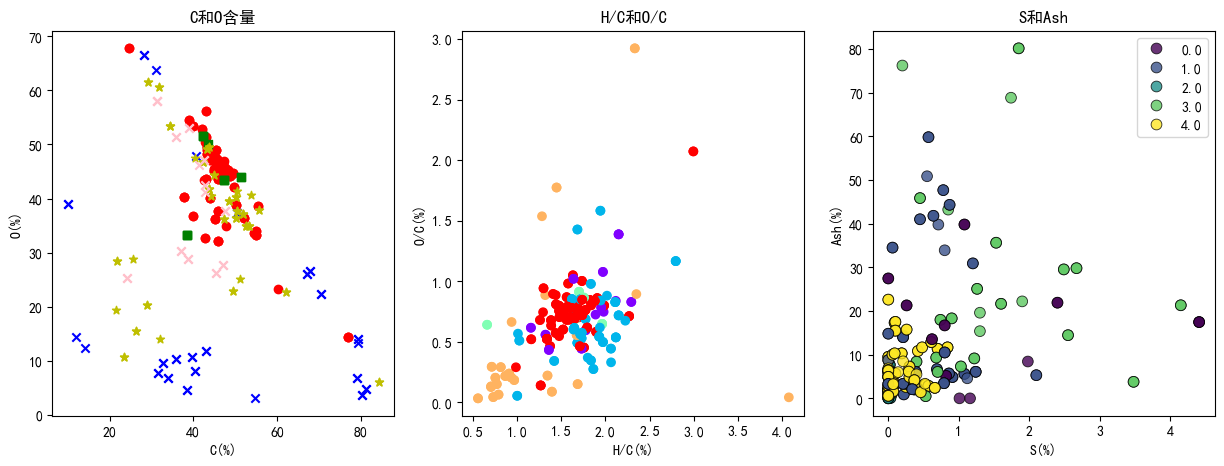

In [13]:
#查看不同类型生物质，（两种）不同含量下的分布情况
X4 = np.array(data[data["Raw materials’ type"]==4].loc[:,['C','O']])
X3 = np.array(data[data["Raw materials’ type"]==3].loc[:,['C','O']])
X2 = np.array(data[data["Raw materials’ type"]==2].loc[:,['C','O']])
X1 = np.array(data[data["Raw materials’ type"]==1].loc[:,['C','O']])
X0 = np.array(data[data["Raw materials’ type"]==0].loc[:,['C','O']])

#绘制图形
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].set_title('C和O含量')
axes[0].set_xlabel('C(%)')
axes[0].set_ylabel('O(%)')

#第一个子图(C、O分布情况)
axes[0].scatter(X4[:,0],X4[:,1],marker='o',color='red')
axes[0].scatter(X3[:,0],X3[:,1],marker='x',color='blue')
axes[0].scatter(X2[:,0],X2[:,1],marker='s',color='green')
axes[0].scatter(X1[:,0],X1[:,1],marker='*',color='y')
axes[0].scatter(X0[:,0],X0[:,1],marker='x',color='pink')

#第二个子图
X_HC_OC = np.array(data.loc[:,["Raw materials’ type",'H/C','O/C']])
axes[1].scatter(X_HC_OC[:,1],X_HC_OC[:,2],c=X_HC_OC[:,0],cmap='rainbow')
axes[1].set_title('H/C和O/C')
axes[1].set_xlabel('H/C(%)')
axes[1].set_ylabel('O/C(%)')

#第三个子图
X_S_Ash = np.array(data.loc[:,["Raw materials’ type",'S','Ash']])
# axes[2].scatter(X_S_Ash[:,1],X_S_Ash[:,2],c=X_S_Ash[:,0],cmap='rainbow')
sns.scatterplot(x=X_S_Ash[:,1],y=X_S_Ash[:,2],hue=X_S_Ash[:,0],palette='viridis', s=60, alpha=0.8, edgecolor='k', ax=axes[2])
axes[2].set_title('S和Ash')
axes[2].set_xlabel('S(%)')
axes[2].set_ylabel('Ash(%)')
#palette='viridis': 指定颜色调色板为 'viridis'。Seaborn 提供了多种预定义的颜色调色板，'viridis' 是一种常用的渐变色调色板。s是点大小，alpha透明度,edgecolor是边缘颜色


## 2.3查看数据内在关系

### 2.3.1热力图1

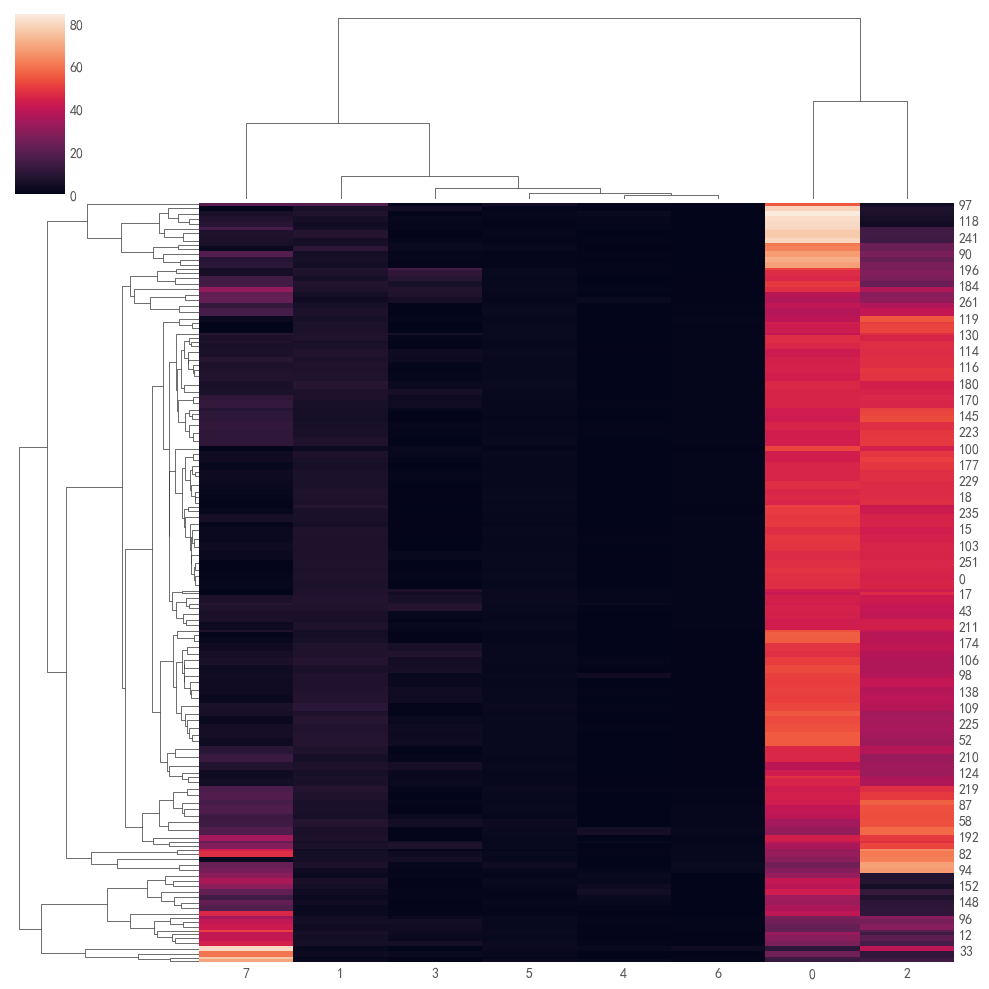

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler   #最大、最小归一化  从这里就可以看出，其对于异常值敏感度特别高

# 获取数据
data = data_oe1.iloc[:,1:-2]
np_data = np.array(data)
#归一化
scaler = MinMaxScaler().fit(np_data)
np_scaler_data = scaler.transform(np_data)

sns.clustermap(np_data)

# 显示图形
plt.show()

### 2.3.2 PCC相关关系图

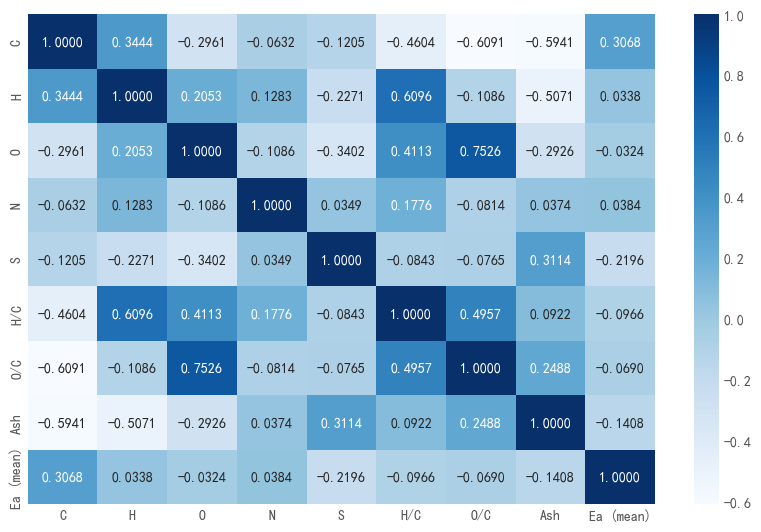

S           -0.219647
Ash         -0.140820
H/C         -0.096623
O/C         -0.069035
O           -0.032361
H            0.033823
N            0.038425
C            0.306834
Ea (mean)    1.000000
Name: Ea (mean), dtype: float64

In [90]:
import seaborn as sns

# data.drop(['Raw materials’ type','Method'],axis=1,inplace=True)
corr = data.corr()
corr
plt.figure(figsize=(8,5))
sns.heatmap(corr,
            annot=True,  #annptate的缩写,annot默认为False,当annot为True时,在heatmap中每个方格都写入数据
            #annot_kws={'size':10,'weight':'blod','color':'green'},  #annot_kws,当annot为True时，可以设置各个参数包括大小、颜色
            fmt='.4f',  #format的缩写,格式设置,.2f指定显示两位小数
            cmap="Blues"   #matplotlib的colormap名称或颜色对象
)
plt.show()
# 按照房价相关性升序排列。越接近1或-1，说明相关性越大
corr['Ea (mean)'].sort_values()

### 2.3.3成对关系图(多变量研究)

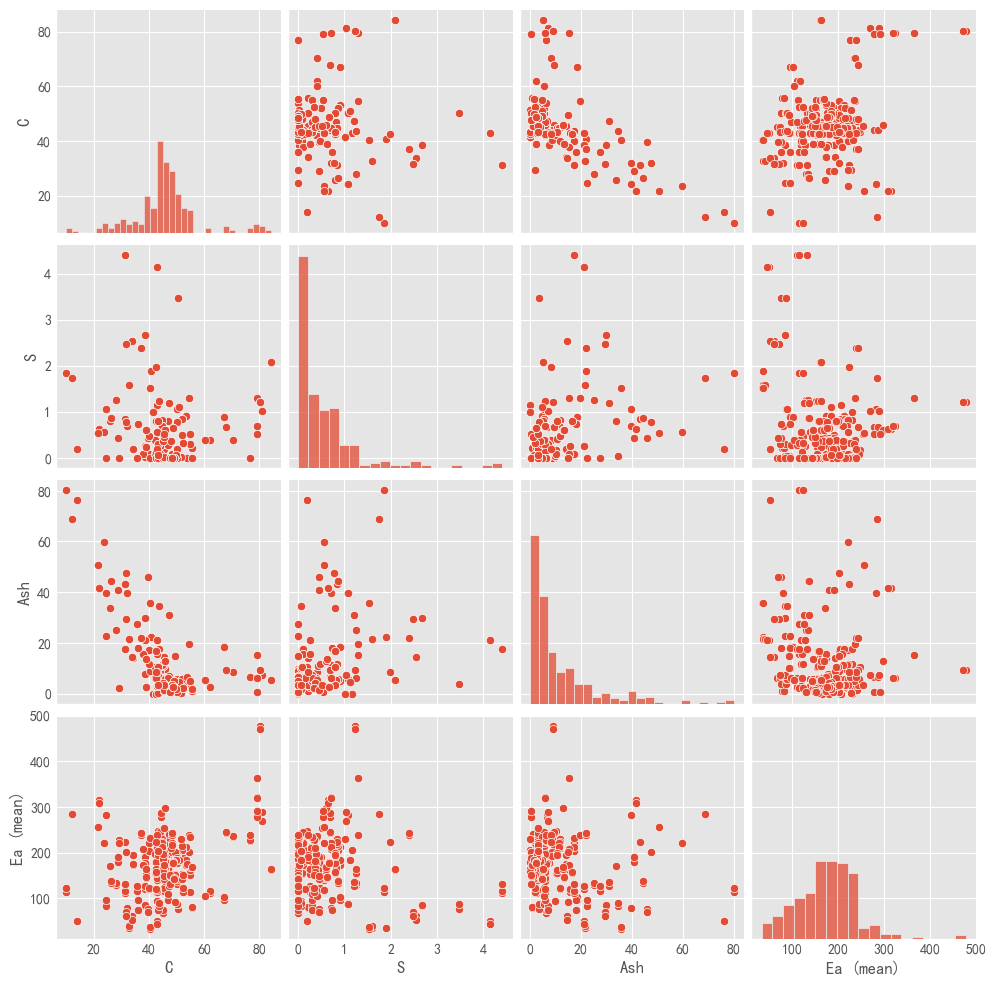

In [91]:
#相关系数前三因素
sns.pairplot(data[["C","S","Ash","Ea (mean)"]]) 
plt.show()

In [110]:
# p检验（双侧检验）   #不一定要用皮尔逊，还有别的方法
import scipy
a = scipy.stats.pearsonr(data.loc[:,'C'], data.loc[:,"Ash"])
a[1]

3.33554858744872e-28

# 3.模型训练

In [102]:
#数据准备
data_raw = data_oe1.copy()
X = data_raw.drop("Ea (mean)",axis=1)
y = data_raw.loc[:,'Ea (mean)']
X = np.array(X)
y = np.array(y)

## 3.1支持向量机SVM(回归算法SVR)

In [103]:
#导入相应的包
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=3)

In [104]:
#归一化(并输出测试集中，每一列特征最大数值)
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

scaler_x = MinMaxScaler().fit(X_train)
# max_num_x = scaler_x.data_max_
# min_num_x = scaler_x.data_min_
# min_num_x

In [105]:
X_train = scaler_x.transform(X_train)
X_test = scaler_x.transform(X_test)
X_train[0]

array([0.        , 0.47647931, 0.28425242, 0.68295701, 0.07122507,
       0.11791383, 0.29710104, 0.25895918, 0.04167707, 0.5       ])

In [112]:
svr_poly = SVR(kernel='rbf', degree=3, gamma=10, coef0=0.0, tol=0.001, C=100)
svr_poly.fit(X_train,y_train)

y_pred=svr_poly.predict(X_test)
print(y_pred)
print(y_test)
print("决定系数(R^2):",svr_poly.score(X_test,y_test))
print("均方根误差(RMSE):",np.sqrt(mean_squared_error(y_test,y_pred)))

[174.38357132 186.65012845 181.90765685 166.93574037 226.41000443
 184.35468298 184.55176747 189.58557635 175.37784502 169.46664888
 228.91024842 167.47884863 104.91348344 163.94566067 178.59319283
 177.9101675  158.14040868  88.09019399 190.53587051 290.68601677
 177.89235124 132.54376247 166.10677007 158.58792256 184.44225877
 185.1611887  227.94433279 188.01201379 175.28801707]
[238.2    240.     197.63   120.54   207.     207.8    214.13   245.7
 190.1    165.8    229.01   285.1    151.74   202.21   202.19   212.86
 145.713   53.1    167.6426 319.66   180.44    75.9    184.08   142.72
 186.06    89.63   231.2    208.8    152.02  ]
决定系数(R^2): 0.4652377933202563
均方根误差(RMSE): 41.69424625197849


In [95]:
#k折交叉检验与网格搜索
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

cv = KFold(5,shuffle=True,random_state=42)
param = {
         "C":[i for i in range(90,150)],
         "gamma":[i*0.1 for i in range(90,110)]
        }
svr_rbf_or_poly = SVR(kernel='rbf')

grid_search_SVR = GridSearchCV(svr_rbf_or_poly,param,cv=cv,scoring='r2')
grid_search_SVR.fit(X_train,y_train)

print("最高精准率:",grid_search_SVR.best_score_)
print("最佳参数组合:",grid_search_SVR.best_params_)

最高精准率: 0.16852697323951618
最佳参数组合: {'C': 90, 'gamma': 9.0}


E:\Anaconda\envs\Newone\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


### 3.1.1去掉类别及方法

In [126]:
from sklearn.model_selection import train_test_split
#获取数据
data_raw = data.copy()
data_raw = data_raw.drop(['Raw materials’ type','Method'],axis=1)
X = np.array(data_raw.iloc[:,:-1])
y = np.array(data_raw.loc[:,'Ea (mean)'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=7)

In [127]:
from sklearn.preprocessing import MinMaxScaler   #svm一般都需要归一化处理
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR

svr_model = SVR(kernel='linear')
pipe = make_pipeline(MinMaxScaler(),svr_model)

pipe.fit(X_train,y_train)
print(pipe.score(X,y))

0.01850407279257693


### 3.1.2单独针对生物质废料

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

waste_data = data[data['Raw materials’ type']=='Lignocellulose'].reset_index(drop = True).drop('Raw materials’ type',axis=1)

X = waste_data.drop('Ea (mean)',axis=1)
y = waste_data.loc[:,'Ea (mean)']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

a = X_train.copy()
a['Ea (mean)'] = y_train
waste_data_train_ori = a

waste_data_train_plus = waste_data_train_ori.copy()
for i in range(8):
    waste_samples = waste_data_train_ori.sample(frac=0.8,random_state=i+25)
    waste_samples_index = waste_samples.index
    waste_samples_method = np.array(waste_samples.pop("Method")).reshape(-1,1)
    waste_samples_array = np.array(waste_samples)
    waste_samples_array_new = add_noise(waste_samples_array,noise_factor=0.05)
    waste_new = np.append(waste_samples_array_new,waste_samples_method,axis=1)
    waste_new_df = pd.DataFrame(waste_new,columns=['C', 'H', 'O', 'N', 'S', 'H/C', 'O/C', 'Ash','Ea (mean)' ,'Method'])
    waste_data_train_plus = pd.concat([waste_data_train_plus,waste_new_df],axis=0,ignore_index=True)
X_train_plus = waste_data_train_plus.iloc[:,:-1]
y_train_plus = waste_data_train_plus.loc[:,'Ea (mean)']

categories = []
ohc = OneHotEncoder()
ohc_data = ohc.fit_transform(X_train_plus[['Method']]).toarray()
for k,j in enumerate(ohc.categories_[0]):
    categories.append('method_'+j)
ohc_data_df = pd.DataFrame(ohc_data,columns=[i for i in categories])
X_train_plus = pd.concat([X_train_plus,ohc_data_df],axis=1).drop('Method',axis=1)

X_test.reset_index(inplace=True)
y_test.index = [i for i in range(len(y_test))]
categories1 = []
ohc1 = OneHotEncoder()
ohc_data1 = ohc1.fit_transform(X_test[['Method']]).toarray()
for k,j in enumerate(ohc1.categories_[0]):
    categories1.append('method_'+j)
ohc_data_df1 = pd.DataFrame(ohc_data1,columns=[i for i in categories])
X_test = pd.concat([X_test,ohc_data_df1],axis=1).drop(['Method','index'],axis=1)

#归一化
X_train_plus = np.array(X_train_plus)
y_train_plus = np.array(y_train_plus)
X_test = np.array(X_test)
y_test = np.array(y_test)
scaler_x = MinMaxScaler().fit(X_train_plus)
X_train_plus = scaler_x.transform(X_train_plus)
X_test = scaler_x.transform(X_test)

In [39]:
waste_data = data[data['Raw materials’ type']=='Biodegradable waste'].reset_index(drop = True).drop('Raw materials’ type',axis=1)
waste_data[:50]

,C,H,O,N,S,H/C,O/C,Ash,Method,Ea (mean)
0,55.72,4.81,37.92,0.43,0.22,1.0285,0.5108,0.90,KAS,79.000
1,55.72,4.81,37.92,0.43,0.22,1.0285,0.5108,0.90,OFW,82.000
2,31.97,5.54,14.11,2.88,0.71,2.0647,0.3313,39.78,KAS,79.590
3,29.23,4.77,61.62,4.38,0.00,1.9443,1.5824,2.00,KAS,227.900
4,29.23,4.77,61.62,4.38,0.00,1.9443,1.5824,2.00,OFW,221.500
5,44.20,6.59,40.52,8.00,0.69,1.7764,0.6881,6.68,KAS,277.389
6,44.20,6.59,40.52,8.00,0.69,1.7764,0.6881,6.68,OFW,286.588
7,34.31,8.05,53.32,4.10,0.21,2.7955,1.1665,14.00,KAS,172.400
8,34.31,8.05,53.32,4.10,0.21,2.7955,1.1665,14.00,OFW,174.500
9,34.31,8.05,53.32,4.10,0.21,2.7955,1.1665,14.00,FRD,194.500


In [28]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

params = {"C":[20,40,60,80,100],
          "gamma":[0.2,0.4,0.6,0.8,1,4,6,8,10],
          "epsilon":[0.1,0.2,0.3,0.8]}
cv = KFold(5,shuffle=True)

svr_rbf = SVR(kernel='rbf')
grid_search = GridSearchCV(svr_rbf,params,cv=cv,scoring='r2')
grid_search.fit(X_train_plus,y_train_plus)

print("最高精准率:",grid_search.best_score_)
print("n_neighbors值:",grid_search.best_params_)

最高精准率: 0.9999613971258727
n_neighbors值: {'C': 100, 'epsilon': 0.1, 'gamma': 10}


In [41]:
svr_rbf1 = SVR(kernel='rbf',C=100,epsilon=0.1,gamma=10)
svr_rbf1.fit(X_train_plus,y_train_plus)
y_pred=svr_rbf1.predict(X_test)
print(y_pred)
print(y_test)
print("决定系数(R^2):",svr_rbf1.score(X_test,y_test))
print("均方根误差(RMSE):",np.sqrt(mean_squared_error(y_test,y_pred)))

[174.78664667 243.55059731 190.48121487 208.58358743 169.88734654
 199.30139146 172.53478219 179.36312549 168.49535619 134.30293933
 180.65272225 186.73577791 206.4343557  130.92072857 167.99907925
 209.89660511 229.15850331 156.76523415 202.57622252 177.79882389
 156.65701502 146.26609713 173.55987873 176.58368827 206.79301836
 179.03455819 166.42091653]
[238.1    130.6    168.86   207.8    145.36   229.33   123.15   168.24
 109.94   155.75    84.02   226.     217.7    255.     177.06   203.4
 181.2733 113.85   174.2    169.67   196.37   169.51   163.5064 220.43
 121.22   226.75   138.78  ]
决定系数(R^2): -0.38258947855217595
均方根误差(RMSE): 51.361481165586476


## 3.2线性回归

In [181]:
#数据准备
from sklearn.model_selection import train_test_split

data_raw = data_oe1.copy()
X = data_raw.drop("Ea (mean)",axis=1)
y = data_raw.loc[:,'Ea (mean)']
X = np.array(X)
y = np.array(y)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=7)

In [182]:
from sklearn.linear_model import LinearRegression # 线性回归模型
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

for degree in [1,2,3,4,5]:
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    lin_reg = LinearRegression()
    polynonlinear_regression = make_pipeline(polybig_features,lin_reg)
    polynonlinear_regression.fit(X_train,y_train)
    y_pred = polynonlinear_regression.predict(X_test)
    print("决定系数(R^2):",polynonlinear_regression.score(X_test,y_test))
    print("均方根误差(RMSE):",np.sqrt(mean_squared_error(y_test,y_pred)))
    #可以看到当degree=2时，拟合效果较好

决定系数(R^2): 0.08022530989742627
均方根误差(RMSE): 49.67342197422106
决定系数(R^2): 0.3371574991471138
均方根误差(RMSE): 42.16853620034994
决定系数(R^2): -226.53521758312255
均方根误差(RMSE): 781.2817231954529
决定系数(R^2): -1002.3346767572875
均方根误差(RMSE): 1640.6134330881919
决定系数(R^2): -909.8687483538404
均方根误差(RMSE): 1563.1881454456022


## 3.3随机森林

In [4]:
#数据准备
from sklearn.model_selection import train_test_split
data_raw = data_oe1.copy()
X = data_raw.drop("Ea (mean)",axis=1)
y = data_raw.loc[:,'Ea (mean)']
X = np.array(X)
y = np.array(y)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=342)
X_train

array([[ 4.    , 42.6   ,  8.2   , ...,  0.8299, 16.7   ,  0.    ],
       [ 4.    , 47.02  ,  6.83  , ...,  0.444 ,  5.14  ,  0.    ],
       [ 0.    , 52.12  ,  5.86  , ...,  0.5245,  3.02  ,  0.    ],
       ...,
       [ 0.    , 76.83  ,  8.19  , ...,  0.1406,  6.38  ,  2.    ],
       [ 2.    , 42.38  ,  6.06  , ...,  0.9132,  0.    ,  2.    ],
       [ 0.    , 46.27  ,  6.43  , ...,  0.7592,  1.    ,  1.    ]])

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100,150,170,200,250],
              'max_depth': [10,15,17,19],
              'max_features': ['sqrt', 'log2']}

grid_search_RF = GridSearchCV(RandomForestRegressor(oob_score=True), param_grid, cv=5)
grid_search_RF.fit(X_train,y_train)

# y_pred = rf_model.predict(X_test)

# print("决定系数R^2:",rf_model.score(X,y))
# print("均方根误差(RMSE):",np.sqrt(mean_squared_error(y_test,y_pred)))

print("最高精准率:",grid_search_RF.best_score_)
print("最佳参数组合:",grid_search_RF.best_params_)

最高精准率: 0.5391675879332833
最佳参数组合: {'max_depth': 17, 'max_features': 'log2', 'n_estimators': 170}


In [8]:
rf_model = RandomForestRegressor(n_estimators=170,max_features='log2',oob_score=True,max_depth=17)
rf_model.fit(X_train,y_train)

y_pred = rf_model.predict(X_test)

print("决定系数R^2:",rf_model.score(X_test,y_test))
print("决定系数R^2:",rf_model.score(X,y))
print("均方根误差(RMSE):",np.sqrt(mean_squared_error(y_test,y_pred)))
mape = calculate_mape(y_test, y_pred)
print(f'MAPE: {mape:.2f}%')

决定系数R^2: 0.8317928104853847
决定系数R^2: 0.9416949274597294
均方根误差(RMSE): 26.48217698325893
MAPE: 18.27%


In [136]:
lst = list(data_oe3.columns)
lst.remove('Ea (mean)')
lst

['C',
 'H',
 'O',
 'N',
 'S',
 'H/C',
 'O/C',
 'Ash',
 'type_Algae',
 'type_Biodegradable waste',
 'type_Cellulose',
 'type_Fossil',
 'type_Lignocellulose',
 'method_FRD',
 'method_KAS',
 'method_OFW']

[0.15042845 0.0993893  0.12560689 0.07562372 0.09953989 0.15633651
 0.12914869 0.08396431 0.00506243 0.01013197 0.00194326 0.02817929
 0.00559053 0.01324619 0.01044144 0.00536713]


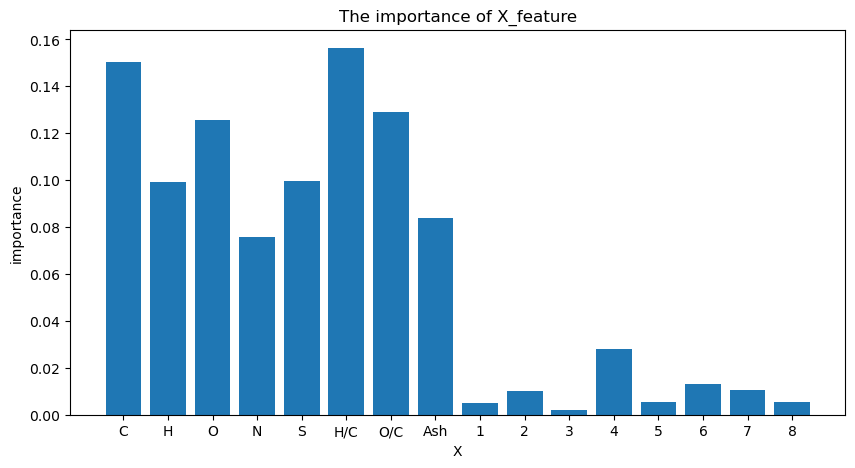

In [140]:
#查看特征重要度
feature_importance = rf_model.feature_importances_

lst = ['C','H','O','N','S','H/C','O/C','Ash','1','2','3','4','5','6','7','8']

print(feature_importance)
plt.figure(figsize=(10, 5))
plt.bar(lst, feature_importance)
plt.xlabel('X')
plt.ylabel('importance')
plt.title('The importance of X_feature')
plt.show()

### 3.3.1单独针对木质素生物质

In [79]:
#针对小样本数据进行，随机取样加噪声注入，创造"新样本"
#判断数据有几位小数
def count_decimal_places(number):
    # 将数字转换为字符串
    number_str = str(number)
    
    # 找到小数点的位置
    decimal_point_index = number_str.find(".")
    
    # 如果存在小数点，则计算小数部分的长度
    if decimal_point_index != -1:
        decimal_part = number_str[decimal_point_index + 1:]
        return len(decimal_part)
    else:
        # 如果不存在小数点，说明没有小数部分
        return 0

#定义添加噪声函数
def add_noise(X, noise_factor=0.03):
    #创造一个储存新数据的列表
    new_data =list()

    #获取每一个特征的最大值
    X_max = X.max(axis=0)

    #添加噪音
    for col_num in range(len(X[0])):
        X_max_decimal_count = count_decimal_places(X_max[col_num])
        col_add_noise = noise_factor*(X_max[col_num]/100)*np.random.normal(loc=0.0, scale=1.0, size=X[:,col_num].shape)+X[:,col_num]
        col_add_noise = col_add_noise.round(X_max_decimal_count)
        new_data.append(col_add_noise)

    new_data = np.vstack(new_data)
    new_data = np.where(new_data.T<=0,+0,new_data.T)
    
    return new_data
        

In [144]:
#数据准备(独热编码)
data_raw = data.copy()
# X = data_raw.drop("Ea (mean)",axis=1)
Lignocellulose_data = data_raw[data_raw['Raw materials’ type']=='Lignocellulose'].reset_index(drop=True)
Lignocellulose_data = Lignocellulose_data.iloc[:,1:]

Lignocellulose_data


,C,H,O,N,S,H/C,O/C,Ash,Method,Ea (mean)
0,47.60,6.76,44.51,1.13,0.00,1.6921,0.7019,1.24,KAS,197.60
1,47.60,6.76,44.51,1.13,0.00,1.6921,0.7019,1.24,OFW,197.30
2,47.60,6.76,44.51,1.13,0.00,1.6921,0.7019,1.24,FRD,186.00
3,44.19,6.30,48.74,0.74,0.00,1.6986,0.8279,6.68,KAS,226.00
4,44.19,6.30,48.74,0.74,0.00,1.6986,0.8279,6.68,OFW,226.00
...,...,...,...,...,...,...,...,...,...,...
130,43.30,6.32,48.90,1.38,0.07,1.7390,0.8477,3.24,KAS,204.00
131,43.30,6.32,48.90,1.38,0.07,1.7390,0.8477,3.24,OFW,203.20
132,48.69,6.39,44.26,0.00,0.66,1.5637,0.6823,2.40,KAS,179.95
133,48.69,6.39,44.26,0.00,0.66,1.5637,0.6823,2.40,OFW,180.47


In [155]:
#增加新数据
data_df = Lignocellulose_data
for i in range(4):
    Ligcocellulose_samples = Lignocellulose_data.sample(frac=0.8,random_state=i+25)
    Ligcocellulose_samples_index = Ligcocellulose_samples.index
    Ligcocellulose_samples_method = np.array(Ligcocellulose_samples.pop("Method")).reshape(-1,1)
    Ligcocellulose_samples_array = np.array(Ligcocellulose_samples)
    Ligcocellulose_samples_array_new = add_noise(Ligcocellulose_samples_array,noise_factor=0.05)
    Ligcocellulose_new = np.append(Ligcocellulose_samples_array_new,Ligcocellulose_samples_method,axis=1)
    Ligcocellulose_new_df = pd.DataFrame(Ligcocellulose_new_1,columns=['C', 'H', 'O', 'N', 'S', 'H/C', 'O/C', 'Ash','Ea (mean)' ,'Method'])
    data_df = pd.concat([data_df,Ligcocellulose_new_df],axis=0,ignore_index=True)
data_df.loc[:,'Ea (mean)']

0       197.6
1       197.3
2       186.0
3       226.0
4       226.0
        ...  
562    177.12
563    227.15
564    153.05
565    186.08
566    104.44
Name: Ea (mean), Length: 567, dtype: object

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

#分离特征与指标
Ligcocellulose_X = data_df.iloc[:,:-1]
Ligcocellulose_y = data_df.loc[:,'Ea (mean)']
#对Lignocellulose_X进行独热编码
categories = []
ohc = OneHotEncoder()
ohc_data = ohc.fit_transform(Ligcocellulose_X[['Method']]).toarray()

for i,name in enumerate(ohc.categories_[0]):
    categories.append('methed_'+name)

ohc_data = pd.DataFrame(ohc_data,columns = [i for i in categories])
ohc_data

#去掉原有Method列，添加独热编码
Ligcocellulose_X.drop(columns=['Method'],inplace=True)  
Lignocellulose_X = pd.concat([Ligcocellulose_X,ohc_data],axis=1)

Lignocellulose_X = np.array(Lignocellulose_X)
Lignocellulose_y = np.array(Ligcocellulose_y)

X_train,X_test,y_train,y_test = train_test_split(Lignocellulose_X,Lignocellulose_y,test_size=0.2,random_state=7)

In [151]:
#数据准备（序号编码）
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

Method_type = {
    'KAS':1,
    'OFW':2,
    'FRD':3
}

data_raw = data.copy()
X = data_raw.drop("Ea (mean)",axis=1)
Lignocellulose_X = X[X['Raw materials’ type']=='Lignocellulose'].reset_index(drop=True)
Lignocellulose_X = Lignocellulose_X.iloc[:,1:]
y = data_raw.loc[:,'Ea (mean)']
Lignocellulose_y = y[X['Raw materials’ type']=='Lignocellulose'].reset_index(drop=True)
Lignocellulose_X['Method'] = Lignocellulose_X['Method'].map(Method_type).astype('category')

Lignocellulose_X = np.array(Lignocellulose_X)
Lignocellulose_y = np.array(Lignocellulose_y)

X_train,X_test,y_train,y_test = train_test_split(Lignocellulose_X,Lignocellulose_y,test_size=0.1,random_state=7)

In [160]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [10,20,50, 100, 150,200,300],
              'max_depth': [None, 10, 20,30],
              'max_features': ['sqrt', 'log2']}

grid_search_RF = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search_RF.fit(X_train,y_train)

# y_pred = rf_model.predict(X_test)

# print("决定系数R^2:",rf_model.score(X,y))
# print("均方根误差(RMSE):",np.sqrt(mean_squared_error(y_test,y_pred)))

print("最高精准率:",grid_search_RF.best_score_)
print("最佳参数组合:",grid_search_RF.best_params_)

最高精准率: 0.9407087433371574
最佳参数组合: {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 50}


In [161]:
rf_model = RandomForestRegressor(max_depth= 10,n_estimators=200,max_features='sqrt')
rf_model.fit(X_train,y_train)

y_pred = rf_model.predict(X_test)

print("决定系数R^2:",rf_model.score(X_test,y_test))
print("均方根误差(RMSE):",np.sqrt(mean_squared_error(y_test,y_pred)))

决定系数R^2: 0.9743491396943744
均方根误差(RMSE): 6.72193913293371


## 3.4XGBoost模型


In [183]:
#数据准备
data_raw = data_oe1.copy()
X = data_raw.drop("Ea (mean)",axis=1)
y = data_raw.loc[:,'Ea (mean)']
X = np.array(X)
y = np.array(y)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=7)

In [184]:
import xgboost as xgb

# 定义参数
params = {
    'objective': 'reg:squarederror',# 目标函数：回归问题：均方误差
    'subsample': 0.8,               # 默认是1，这个参数控制对于每棵树，随机采样的比例。减小这个参数的值算法会更加保守，避免过拟合。但是这个值设置的过小，它可能会导致欠拟合。 (0,1]
    'colsample_bytree': 0.9,        # 默认是1，用来控制每棵树随机采样的列数的占比； (0,1]
    'max_depth': 3,                 # 默认是6，树的最大深度，值越大，越容易过拟合；[0，∞]
    'learning_rate': 0.1,           # 学习率
    'n_estimators': 100             # 弱学习器的数量
}

xgb_model = xgb.XGBRegressor(**params)
xgb_model.fit(X_train,y_train)

y_pred4 = xgb_model.predict(X_test)

print("决定系数R^2:",xgb_model.score(X_test,y_test))
print("均方根误差(RMSE):",np.sqrt(mean_squared_error(y_test,y_pred4)))

决定系数R^2: 0.7976202417552751
均方根误差(RMSE): 23.300588407847695


## 3.5GBDT模型

In [12]:
from sklearn.model_selection import train_test_split
#数据准备
data_raw = data_oe3.copy()
X = data_raw.drop("Ea (mean)",axis=1)
y = data_raw.loc[:,'Ea (mean)']
X = np.array(X)
y = np.array(y)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=7)

In [13]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV


# 定义参数网格
param_grid = {
    'n_estimators': [100, 200,300],        # 决策树的数量
    'learning_rate': [0.01, 0.1, 0.2],    # 学习率
    'max_depth': [3, 5, 7],                # 决策树的深度
    'min_samples_split': [2, 5, 10],        # 分割叶子节点所需的最小样本数
    'min_samples_leaf': [1, 2, 5]          # 叶子节点所需最小样本数
}

gbdt_model = GradientBoostingRegressor()

# 使用网格搜索进行调参
grid_search = GridSearchCV(estimator=gbdt_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)


# 输出最佳参数
print("Best parameters found: ", grid_search.best_params_)

E:\Anaconda\envs\Newone\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters found:  {'learning_rate': 0.2, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [17]:
from sklearn.metrics import mean_squared_error
gbdt_model = GradientBoostingRegressor(learning_rate=0.2,max_depth=7,min_samples_leaf=1,min_samples_split=5,n_estimators=300)
gbdt_model.fit(X_train,y_train)

y_pred5 = gbdt_model.predict(X_test)

#评估
print("决定系数R^2:",gbdt_model.score(X_test,y_test))
print("均方根误差(RMSE):",np.sqrt(mean_squared_error(y_test,y_pred5)))
# 计算MAPE
mape = calculate_mape(y_test, y_pred5)
print(f'MAPE: {mape:.2f}%')

决定系数R^2: 0.9401553613434794
均方根误差(RMSE): 12.670564863545604
MAPE: 7.34%


In [4]:
#导出模型
import pickle

# 保存模型,用“wb”方式写入，即是二进制方式
# pickle.dump(gbdt_model,open("./Models/gbdt_model_NoModel.pkl","wb"))

# 加载模型 
loaded_model = pickle.load(open("./Models/gbdt_model_NoModel.pkl","rb"))

### 3.5.1 绘制双向偏相关图

In [4]:
#查看木质素
data = data_oe3[data_oe3['type_Lignocellulose']==1]
data = data[data['method_FRD']==1]
data.describe()

,C,H,O,N,S,H/C,O/C,Ash,Ea (mean),type_Algae,type_Biodegradable waste,type_Cellulose,type_Fossil,type_Lignocellulose,method_FRD,method_KAS,method_OFW
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0
mean,46.347667,6.406000,43.622000,1.269000,0.205333,1.680743,0.746207,6.935333,192.724110,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
std,7.699987,0.888131,8.626396,1.253517,0.264050,0.334408,0.293892,5.694137,48.595876,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,24.550000,5.140000,14.390000,0.000000,0.000000,1.270100,0.140600,0.580000,73.890000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
25%,43.917500,5.837500,40.097500,0.287500,0.000000,1.489525,0.679450,2.622500,159.967500,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
50%,45.875000,6.235000,44.845000,1.105000,0.090000,1.622900,0.722100,5.295000,195.685000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
75%,47.580000,6.747500,47.530000,1.662500,0.362500,1.787975,0.799500,10.100000,226.005000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
max,76.830000,8.750000,67.760000,5.100000,0.840000,2.994400,2.071800,22.600000,297.130000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [5]:
def predict_oc_ash(X,Y):
    Z = []
    a = np.c_[X.ravel(),Y.ravel()]
    for row in a:
        Z.append(loaded_model.predict([[46.347667,6.406,43.622,1.269,0.205333,1.680743,row[0],row[1],0,0,0,0,1,1,0,0]])[0])
    Z = np.array(Z)
    return Z.reshape(X.shape)
X = np.linspace(0.10,2.10,40)
Y = np.linspace(0.50,20.50,40)
X, Y = np.meshgrid(X, Y)
Z = predict_oc_ash(X,Y)
len(Z)

#np.s_[]
# a = np.array([1,2,3,4,5])
# b = np.array([6,7,8,9,10])
# a_b = np.s_[a,b]
# a_b

40

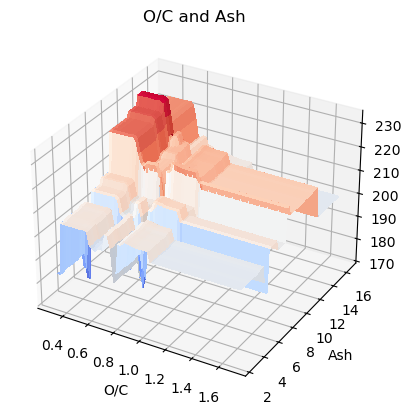

In [11]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from matplotlib.colors import LightSource

# Load and format data
x = np.linspace(0.10,2.10, 100)
y = np.linspace(0.50,20.50,100)
x, y = np.meshgrid(x, y)
z = predict_oc_ash(x,y)

region = np.s_[10:80, 10:80]
x, y, z = x[region], y[region], z[region]

# Set up plot
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

ls = LightSource(315, 45)
# To use a custom hillshading mode, override the built-in shading and pass
# in the rgb colors of the shaded surface calculated from "shade".
rgb = ls.shade(z, cmap=cm.coolwarm, vert_exag=0.1, blend_mode='soft')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=rgb,
                       linewidth=0, antialiased=False, shade=False)
ax.set_title('O/C and Ash')
ax.set_xlabel('O/C')
ax.set_ylabel('Ash')
plt.show()

### 3.5.2 绘制等高线图

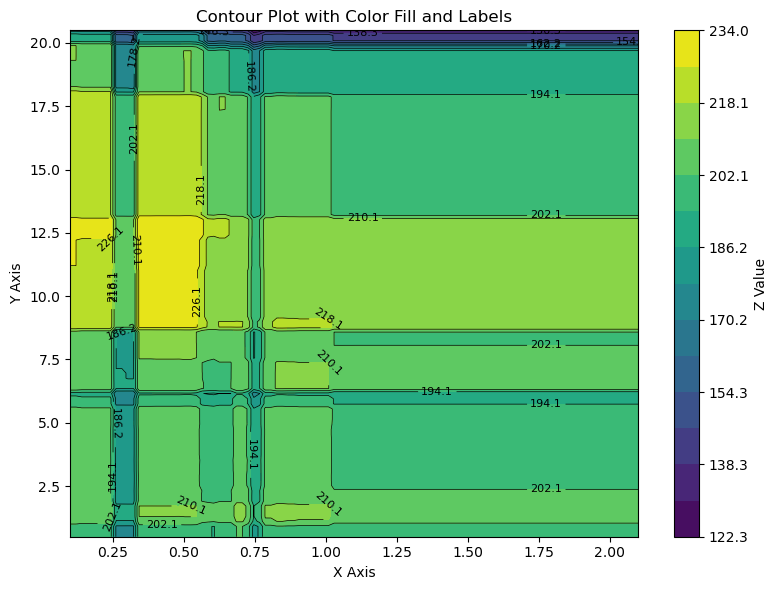

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# 生成示例数据
x = np.linspace(0.10,2.10, 100)
y = np.linspace(0.50,20.50,100)
x, y = np.meshgrid(x, y)
z = predict_oc_ash(x,y)

# 创建画布和坐标轴
fig, ax = plt.subplots(figsize=(8, 6))

# ==================== 核心绘制步骤 ====================
# 1. 绘制颜色填充的等高区域
levels = np.linspace(z.min(), z.max(), 15)  # 设置等高线层级
cf = ax.contourf(x, y, z, levels=levels, cmap=cm.viridis)  # 填充颜色

# 2. 绘制等高线并添加标签
contour = ax.contour(x, y, z, levels=levels, colors='black', linewidths=0.5)
ax.clabel(contour, inline=True, fontsize=8, fmt='%.1f')  # 在线上标注数值

# ==================== 图形美化 ====================
# 添加颜色条
cbar = fig.colorbar(cf, ax=ax)
cbar.set_label('Z Value')

# 设置坐标轴标签
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_title('Contour Plot with Color Fill and Labels')

plt.tight_layout()
plt.show()

### 3.5.3单独针对木质素

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
data_lig = data[data['Raw materials’ type']=='Lignocellulose'].iloc[:,1:]
data_lig_X = data_lig.iloc[:,:-1]
data_lig_y = data_lig.loc[:,'Ea (mean)']
X_train,X_test,y_train,y_test = train_test_split(data_lig_X,data_lig_y,test_size=0.2,random_state=74)

In [84]:
data_lig_train = pd.concat([X_train,y_train],axis=1)
data_lig_train_plus = creat_data(data_lig_train,1,'Method')

data_lig_train_plus_X = data_lig_train_plus.iloc[:,:-1]
data_lig_train_plus_y = data_lig_train_plus.loc[:,'Ea (mean)']

categories = []
ohc = OneHotEncoder()
ohc_data = ohc.fit_transform(data_lig_train_plus_X[['Method']]).toarray()
for k,j in enumerate(ohc.categories_[0]):
    categories.append('method_'+j)
ohc_data_df = pd.DataFrame(ohc_data,columns=[i for i in categories])
data_lig_train_plus_X = pd.concat([data_lig_train_plus_X,ohc_data_df],axis=1).drop('Method',axis=1)

X_test.reset_index(inplace=True)
y_test.index = [i for i in range(len(y_test))]
categories1 = []
ohc1 = OneHotEncoder()
ohc_data1 = ohc1.fit_transform(X_test[['Method']]).toarray()
for k,j in enumerate(ohc1.categories_[0]):
    categories1.append('method_'+j)
ohc_data_df1 = pd.DataFrame(ohc_data1,columns=[i for i in categories])
X_test = pd.concat([X_test,ohc_data_df1],axis=1).drop(['Method','index'],axis=1)

X_train = np.array(data_lig_train_plus_X)
y_train = np.array(data_lig_train_plus_y)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [41]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# 定义参数网格
param_grid = {
    'n_estimators': [100, 200,300],        # 决策树的数量
    'learning_rate': [0.01, 0.1, 0.2],    # 学习率
    'max_depth': [3, 5, 7],                # 决策树的深度
    'min_samples_split': [2, 5, 10],        # 分割叶子节点所需的最小样本数
    'min_samples_leaf': [1, 2, 5]          # 叶子节点所需最小样本数
}

gbdt_model = GradientBoostingRegressor()

# 使用网格搜索进行调参
grid_search = GridSearchCV(estimator=gbdt_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)


# 输出最佳参数
print("Best parameters found: ", grid_search.best_params_)

E:\Anaconda\envs\Newone\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters found:  {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


In [85]:
gbdt_model1 = GradientBoostingRegressor(learning_rate=0.2,max_depth=5,min_samples_leaf=1,min_samples_split=10,n_estimators=300)
gbdt_model1.fit(X_train,y_train)

y_pred5 = gbdt_model1.predict(X_test)
print(y_pred5)
print(y_test)
#评估
print("决定系数R^2:",gbdt_model1.score(X_test,y_test))
print("均方根误差(RMSE):",np.sqrt(mean_squared_error(y_test,y_pred5)))
# 计算MAPE
mape = calculate_mape(y_test, y_pred5)
print(f'MAPE: {mape:.2f}%')

[271.87392973 216.72591203 233.19605646 161.31981476 105.5206574
 205.48225867 140.61403634 161.6072162  195.06189062 121.06207049
 143.7494381  127.72188323  88.00745552 141.63664014 183.72461548
 177.98450003 213.61391036 199.83022941 245.63640766 164.14171819
 250.01946221 166.23398851 132.59717302 206.75667892 170.15501172
 177.06938042 207.365826  ]
[210.5    221.6    169.67   154.35    73.89   181.2733 109.94   142.52
 186.     114.44   152.2    131.73    84.5    122.22   202.19   163.17
 223.5    214.13   239.58   185.18   248.     201.8    123.15   220.12
 199.7    173.4    161.71  ]
决定系数R^2: 0.6963457378756506
均方根误差(RMSE): 25.253396443226773
MAPE: 12.24%


## 3.6 人工神经网络

In [16]:
from sklearn.preprocessing import OneHotEncoder

#人工神经网络对数据需求量较大，故，对数据进行扩充
data_all = data_new.copy()

#独热编码，对Method,type进行独热编码
categories = []
ohc = OneHotEncoder()
ohc_data = ohc.fit_transform(data_all[['Raw materials’ type','Method']]).toarray()
for k,i in enumerate(ohc.categories_):
    for j in i:
        if k ==0:
            categories.append('type_'+j)
        if k ==1:
            categories.append('method_'+j)
ohc_data_df = pd.DataFrame(ohc_data,columns=[i for i in categories])
data_all.drop(columns=['Raw materials’ type','Method'],inplace=True)  #弹出['Raw materials’ type','Method']两列
data_all = pd.concat([data_all,ohc_data_df],axis=1)
data_all

,C,H,O,N,S,H/C,O/C,Ash,Ea (mean),type_Algae,type_Biodegradable waste,type_Cellulose,type_Fossil,type_Lignocellulose,method_FRD,method_KAS,method_OFW
0,45.04,6.29,44.41,5.26,0.0,1.6639,0.7401,6.24,73.87,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,45.6,6.8,46.4,0.6,0.46,1.7768,0.7638,1.4,149.48,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,47.6,6.76,44.51,1.13,0.0,1.6921,0.7019,1.24,186.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,47.02,6.83,27.81,10.53,0.82,1.7307,0.444,5.14,167.4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,46.54,6.49,44.92,1.71,0.34,1.6615,0.7245,2.28,199.7,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22720,14.1,1.1,12.36,0.4,0.2,0.9453,0.6593,76.17,51.5,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
22721,39.9,5.6,36.71,0.5,0.47,1.6525,0.6865,11.62,119.9,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
22722,46.1,5.2,32.12,1.1,0.61,1.3407,0.5255,12.83,163.4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
22723,45.1,6.3,44.42,5.3,0.0,1.6626,0.7415,6.08,74.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [67]:
import torch
import torch.nn as nn
import torch.optim as optim

#定义网络
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size,hidden_size,bias=True)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size,100)
        self.fc3 = nn.Linear(100,50)
        self.pred = nn.Linear(50,output_size)

    def forward(self,x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        out = self.relu(out)
        output = self.pred(out)

        return output.squeeze(1)  #output的形状为（batch_size,1）,squeeze后，形状变为（64，）这样就可以和下面的b_y做运算


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import torch.optim as optim
import torch.utils.data as Data


X = data_all.drop('Ea (mean)',axis=1)
y = data_all['Ea (mean)']
X = np.array(X)
y = np.array(y,dtype=np.float32)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42)

#归一化
scaler_x = StandardScaler().fit(X_train)
X_train = scaler_x.transform(X_train)
X_test = scaler_x.transform(X_test)

# 将数据转换为PyTorch张量
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train,dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# 将训练数据处理为数据加载器
train_data = Data.TensorDataset(X_train, y_train)
test_data = Data.TensorDataset(X_test, y_test)
train_loader = Data.DataLoader(dataset=train_data, batch_size=64, shuffle=True, num_workers=1)
#batch_size 参数指定了每个批次（batch）的大小。在这个例子中，每个批次包含 64 个样本。这意味着在每次迭代时，数据加载器会从数据集中提取 64 个样本。
#num_workers 参数指定用于数据加载的子进程数量。在这个例子中，设置为 1，表示使用一个子进程来加载数据。增加 num_workers 可以提高数据加载的速度，但会增加内存消耗。

# 设置模型参数
input_size = X_train.shape[1]  #参数种类，即有几个参数
hidden_size = 100  # 隐藏层神经元数量，可以根据需要调整
output_size = 1   # 因为是回归类型任务，所以output_size=1

#初始化模型和损失函数和优化器
model = MLP(input_size,hidden_size,output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr=0.01)

train_loss_all = []

In [69]:
# 训练模型
num_epochs = 100
for epoch in range(num_epochs):
    train_loss = 0
    train_num = 0
    # 对训练数据的加载器进行迭代计算
    for step, (b_x, b_y) in enumerate(train_loader):
        model.train() #model.train(): 将模型设置为训练模式。这通常用于启用某些特定于训练的操作，比如dropout和batch normalization。
        optimizer.zero_grad()  # 每次迭代梯度初始化0
        output = model(b_x)  # MLP在训练batch上的输出
        loss = criterion(output, b_y)  # 均方根损失函数，b_y的shape为(64,),这里的output的形状也为(64,)
        loss.backward()  # 反向传播，计算梯度
        optimizer.step()  # 使用梯度进行优化
        train_loss += loss.item() * b_x.size(0)
        train_num += b_x.size(0)
    train_loss_all.append(train_loss / train_num)

In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(train_loss_all)
y_pred = model(X_test)
y_pred = y_pred.data.numpy()  #将数据类型转化为Numpy数组
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
print('在测试集上的MSE为:', mse)
print('在测试集上的绝对值误差为:', mae)

[3168.870006576947, 1418.1551260005324, 1064.0989234128997, 764.9640130487505, 520.2940399390761, 340.89293148548853, 241.53538414999718, 193.18752534427267, 150.44275199357438, 127.67820728107276, 106.69824131458864, 80.01777123089944, 79.78849447493961, 99.70326919301998, 76.68956673478698, 77.29029089966656, 62.66748531378111, 52.713288614387594, 75.2310021570371, 53.13420280644554, 47.63017373222114, 44.20798334486909, 51.00347178261643, 65.23819460944375, 57.54153675457607, 36.372976190815834, 29.899555181678252, 38.81766552834648, 32.93494159079987, 29.335268306004753, 53.37236685503865, 22.3346850747538, 23.63327888684242, 22.745788452234983, 27.852339355301627, 33.79429882033893, 26.247969674942848, 24.5669642115861, 48.84548663775934, 14.651163376592363, 16.553664004338735, 20.186701474860296, 19.036461397973426, 14.394046065906664, 27.806383804777887, 21.662891698307938, 15.779664529598602, 10.723550703249028, 23.156789799807193, 26.902629606089153, 12.452806037068717, 9.6123

In [ ]:
a = np

# 4.模型融合

## 4.1blending方法

In [192]:
#数据准备
data_raw = data_oe3.copy()
X = data_raw.drop("Ea (mean)",axis=1)
y = data_raw.loc[:,'Ea (mean)']
X = np.array(X)
y = np.array(y)

In [193]:
#定义基模型（RF、XGBoost、GBDT）
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


def base_model():
    models = list()
    models.append(('rf_model',RandomForestRegressor(n_estimators=100,max_features='sqrt',max_depth=20)))
    models.append(('xgb_model',xgb.XGBRegressor(objective= 'reg:squarederror',subsample= 0.8, colsample_bytree=0.9, max_depth=3, learning_rate= 0.1,n_estimators=100)))
    models.append(('gbdt_model',GradientBoostingRegressor(learning_rate=0.2,max_depth=7,min_samples_leaf=1,min_samples_split=5,n_estimators=100)))
    return models

#步骤1：分割训练集，验证集，测试集
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=1)

#步骤2：在训练集上训练基模型，在验证上预测
models = base_model()
meta_X = list()

for name,model in models:
    model.fit(X_train,y_train)
    yhat = model.predict(X_val)
    meta_X.append(yhat)

meta_X = np.vstack(meta_X)
meta_X = meta_X.T

#步骤3：建立混合元学习模型
ss = StandardScaler()
meta_X = ss.fit_transform(meta_X)
blender_line = LinearRegression()
#训练混合元学习模型
blender_line.fit(meta_X,y_val)

LinearRegression()

In [194]:
#步骤4：使用混合元学习器进行预测
meta_X = list()
for name,model in models:
    y_raw = model.predict(X_test)
    meta_X.append(y_raw)
    
meta_X = np.vstack(meta_X)
meta_X =meta_X.T
meta_X =ss.transform(meta_X)

y_pred6= blender_line.predict(meta_X)

#评估
print("决定系数R^2:",blender_line.score(meta_X,y_test))
print("均方根误差(RMSE):",np.sqrt(mean_squared_error(y_test,y_pred6)))

决定系数R^2: 0.7266822506019588
均方根误差(RMSE): 32.327315512768834
